Some typical NumPy 'random' functions:

In [ ]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [6]:
# Write your code for AIM #1 here
import pandas as pd
import numpy as np
import time

start_time_pandas = time.time()

pandas_data = pd.DataFrame(np.random.randint(1, 100, size=1000000), columns=["Random_Data"])

end_time_pandas = time.time()

time_pandas = end_time_pandas - start_time_pandas
print(f"Using Pandas to generate 1000000 random data takes: {time_pandas} seconds")

start_time_numpy = time.time()

numpy_data = np.random.randint(1, 101, size=1000000)

end_time_numpy = time.time()

time_numpy = end_time_numpy - start_time_numpy
print(f"Using NumPy to generate 1000000 random data takes: {time_numpy} seconds")

if time_numpy < time_pandas:
    print("NumPy is faster")
else:
    print("Pandas is faster")



Using Pandas to generate 1000000 random data takes: 0.022094011306762695 seconds
Using NumPy to generate 1000000 random data takes: 0.01851820945739746 seconds
NumPy is faster


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [24]:
import pandas as pd
import numpy as np
import time

start_time_pandas = time.time()
df = pd.read_csv('sleep_health.csv')

mean_sleep_duration = df['Sleep Duration'].mean()
mean_systolic_bp = df['Systolic blood pressure'].mean()
mean_diastolic_bp = df['Diastolic blood pressure'].mean()
mean_heart_rate = df['Heart Rate'].mean()
mean_daily_steps = df['Daily Steps'].mean()

print("Pandas Means:")
print(f"Sleep Duration: {mean_sleep_duration}")
print(f"Systolic Blood Pressure: {mean_systolic_bp}")
print(f"Diastolic Blood Pressure: {mean_diastolic_bp}")
print(f"Heart Rate: {mean_heart_rate}")
print(f"Daily Steps: {mean_daily_steps}")

start_time_numpy = time.time()
data = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=1)

mean_sleep_duration_np = np.mean(data[:, 4])
mean_systolic_bp_np = np.mean(data[:, 9])
mean_diastolic_bp_np = np.mean(data[:, 10])
mean_heart_rate_np = np.mean(data[:, 11])
mean_daily_steps_np = np.mean(data[:, 12])

print("NumPy Means:")
print(f"Sleep Duration: {mean_sleep_duration_np}")
print(f"Systolic Blood Pressure: {mean_systolic_bp_np}")
print(f"Diastolic Blood Pressure: {mean_diastolic_bp_np}")
print(f"Heart Rate: {mean_heart_rate_np}")
print(f"Daily Steps: {mean_daily_steps_np}")

correlation_matrix = df.corr()

corr_sleep_age = df['Sleep Duration'].corr(df['Age'])
corr_sleep_heart_rate = df['Sleep Duration'].corr(df['Heart Rate'])
corr_sleep_daily_steps = df['Sleep Duration'].corr(df['Daily Steps'])

print("Pandas Correlations:")
print(correlation_matrix)
print(f"Sleep Duration and Age: {corr_sleep_age}")
print(f"Sleep Duration and Heart Rate: {corr_sleep_heart_rate}")
print(f"Sleep Duration and Daily Steps: {corr_sleep_daily_steps}")

correlation_matrix_np = np.corrcoef(data[:, [4, 2, 11, 12]], rowvar=False)

corr_sleep_age_np = np.corrcoef(data[:, 4], data[:, 2])[0, 1]
corr_sleep_heart_rate_np = np.corrcoef(data[:, 4], data[:, 11])[0, 1]
corr_sleep_daily_steps_np = np.corrcoef(data[:, 4], data[:, 12])[0, 1]

print("NumPy Correlations:")
print(correlation_matrix_np)
print(f"Sleep Duration and Age: {corr_sleep_age_np}")
print(f"Sleep Duration and Heart Rate: {corr_sleep_heart_rate_np}")
print(f"Sleep Duration and Daily Steps: {corr_sleep_daily_steps_np}")

std_sleep_duration = df['Sleep Duration'].std()
print(f"Pandas Standard Deviation of Sleep Duration: {std_sleep_duration}")

std_sleep_duration_np = np.std(data[:, 4])
print(f"NumPy Standard Deviation of Sleep Duration: {std_sleep_duration_np}")

end_time_pandas = time.time()
end_time_numpy = time.time()

time_pandas = end_time_pandas - start_time_pandas
time_numpy = end_time_numpy - start_time_numpy

print(f"Time taken using pandas: {time_pandas} seconds")
print(f"Time taken using NumPy: {time_numpy} seconds")

if time_pandas < time_numpy:
    print("Pandas is faster.")
else:
    print("NumPy is faster.")




Pandas Means:
Sleep Duration: 7.132085561497325
Systolic Blood Pressure: 128.55347593582889
Diastolic Blood Pressure: 84.64973262032086
Heart Rate: 70.16577540106952
Daily Steps: 6816.844919786096
NumPy Means:
Sleep Duration: 7.132085561497325
Systolic Blood Pressure: 128.55347593582889
Diastolic Blood Pressure: 84.64973262032086
Heart Rate: 70.16577540106952
Daily Steps: 6816.844919786096


ValueError: could not convert string to float: 'Male'

AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

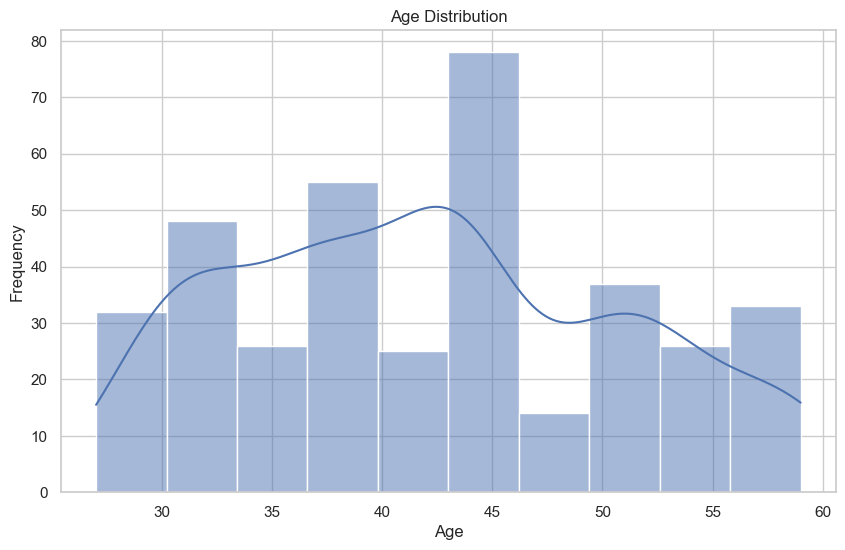

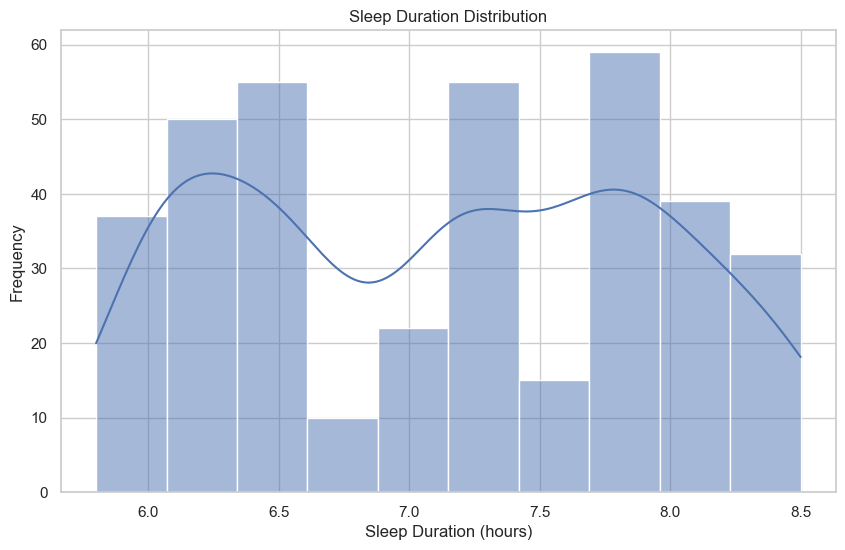

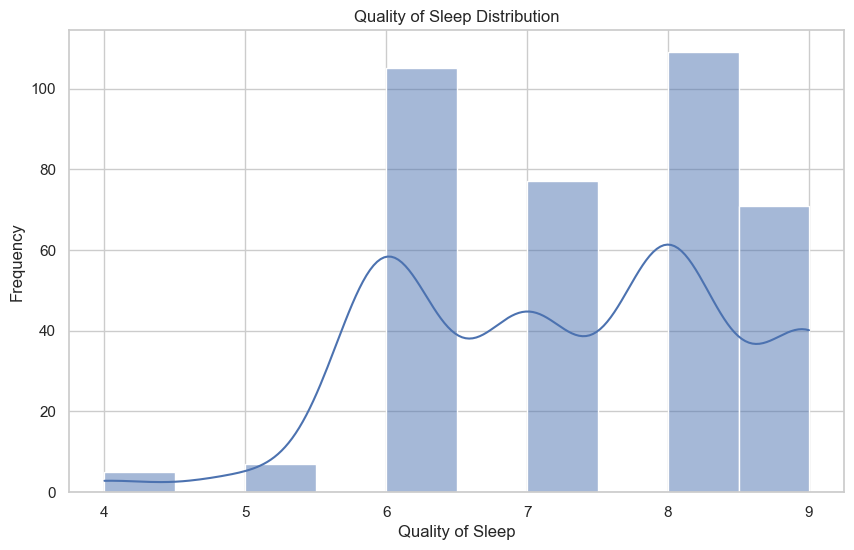

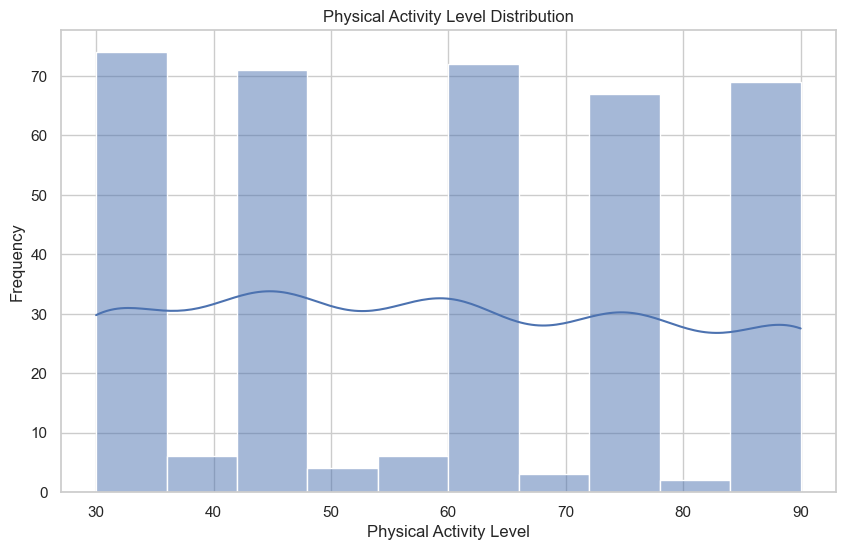

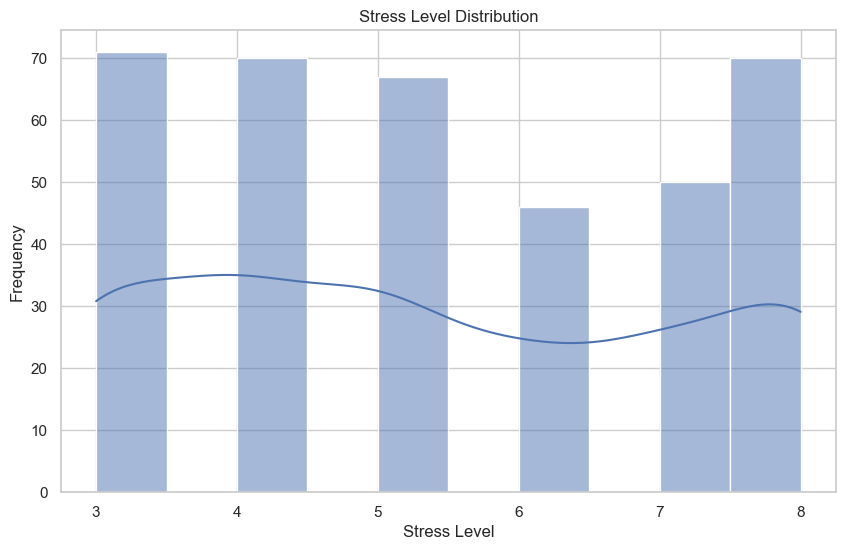

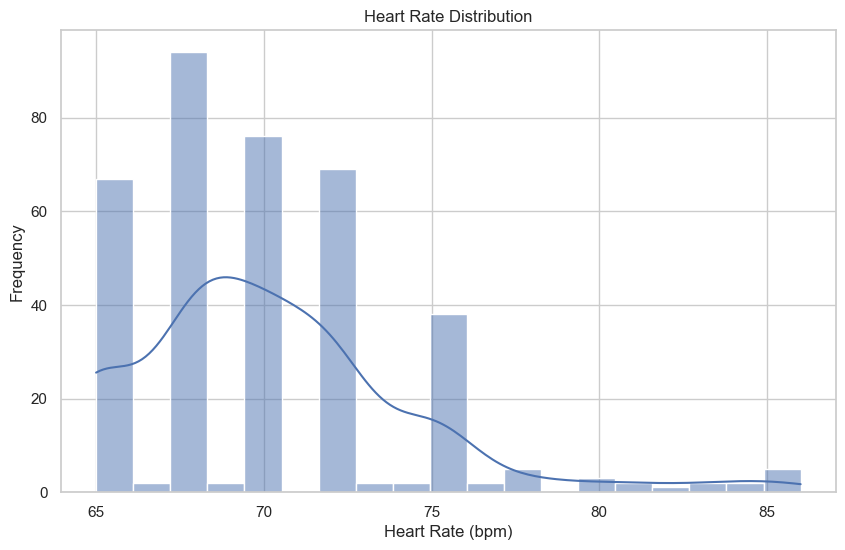

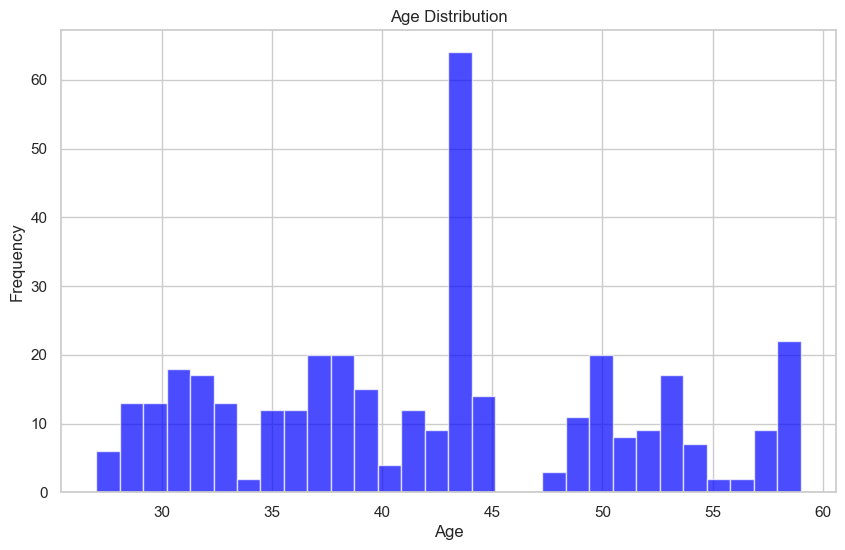

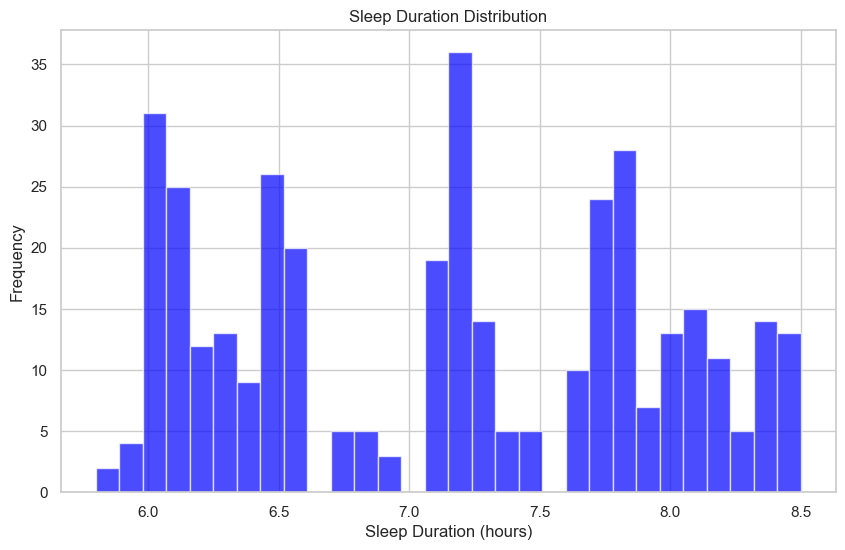

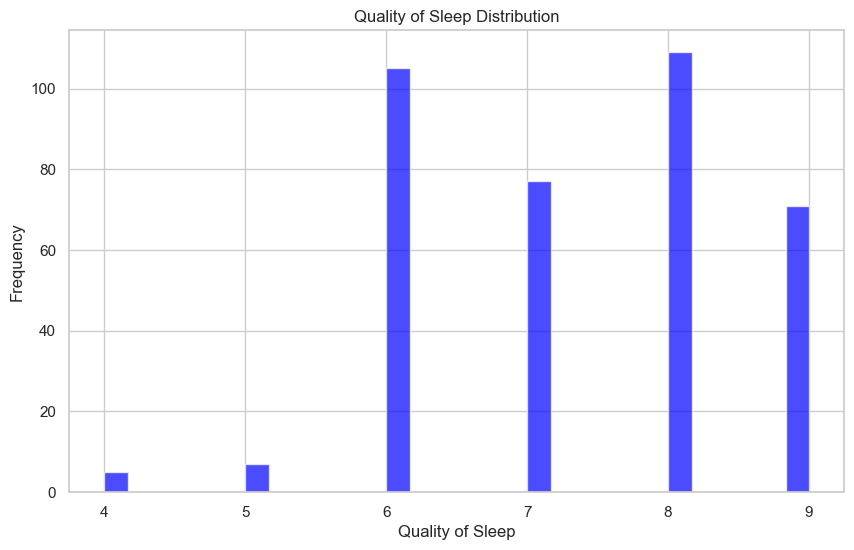

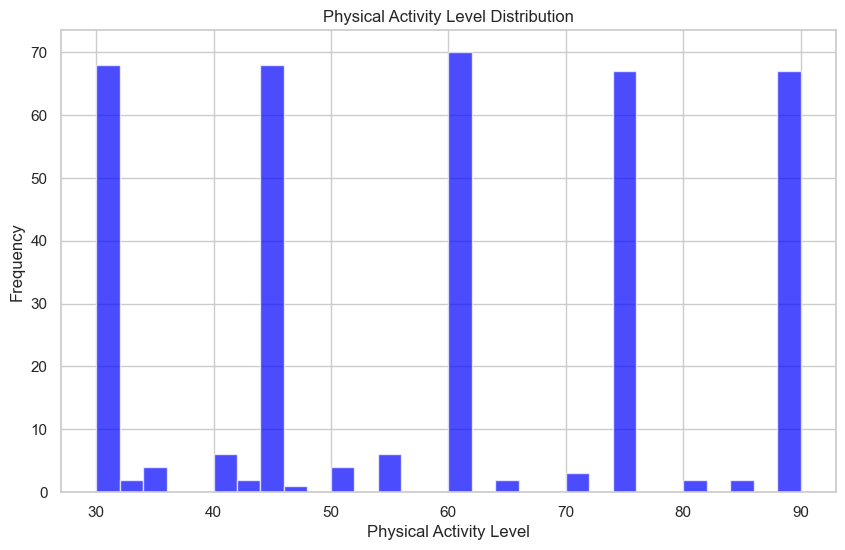

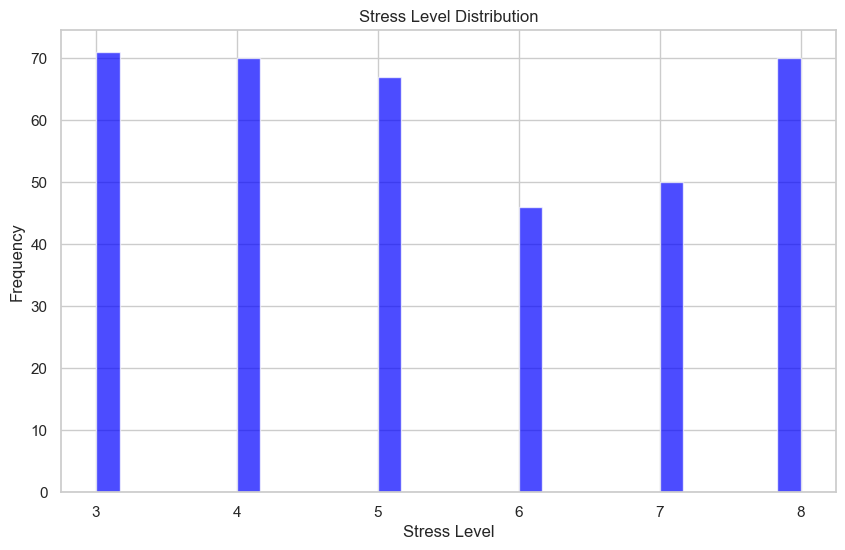

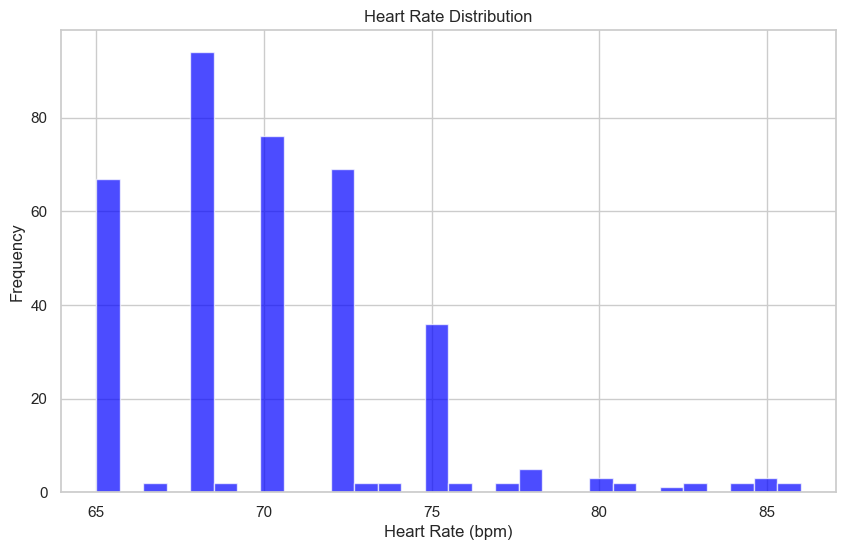

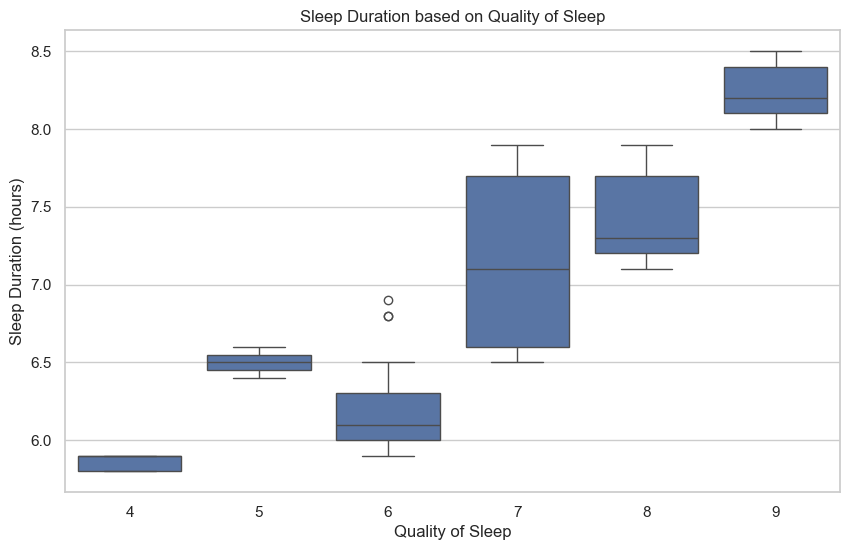

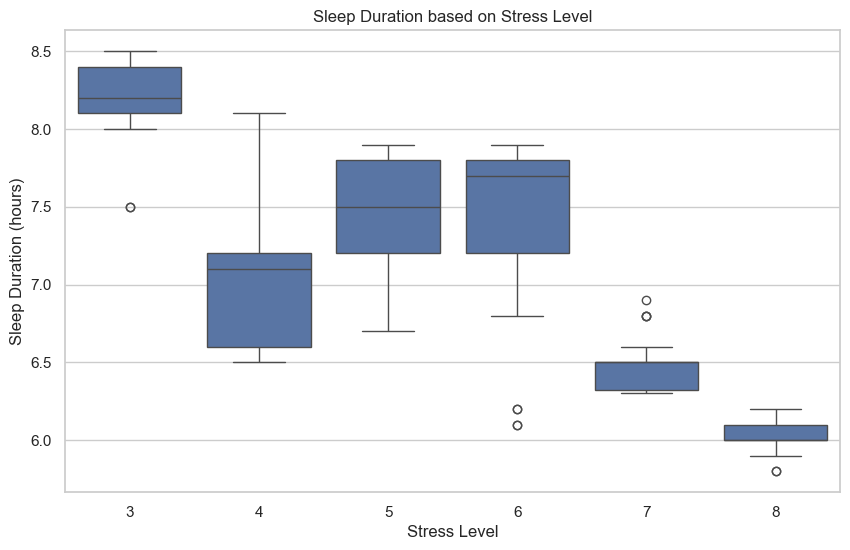

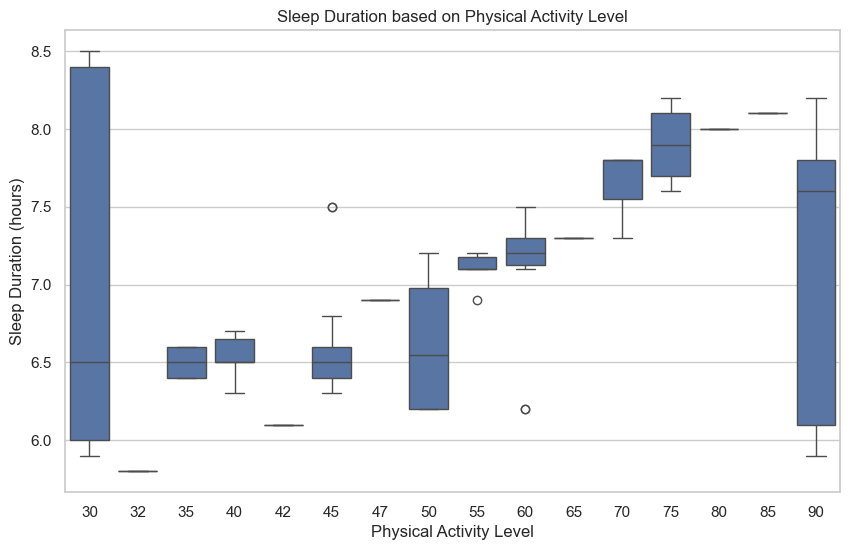

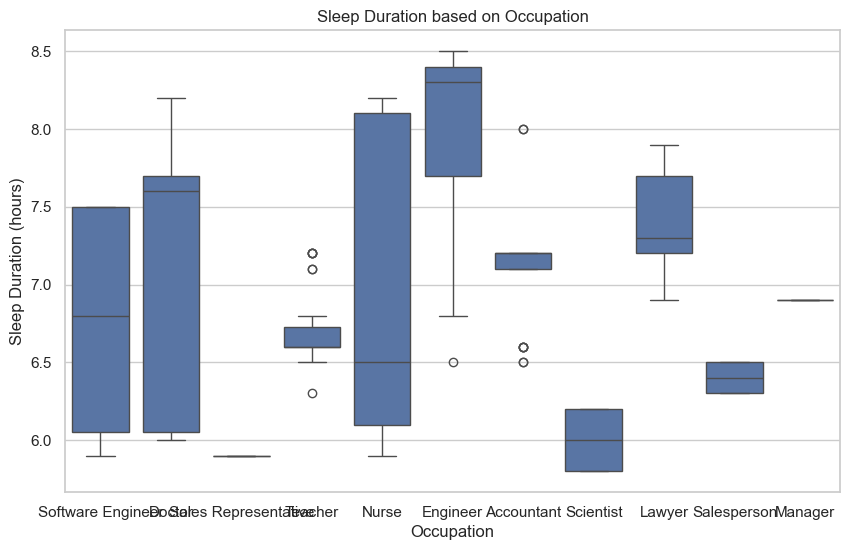

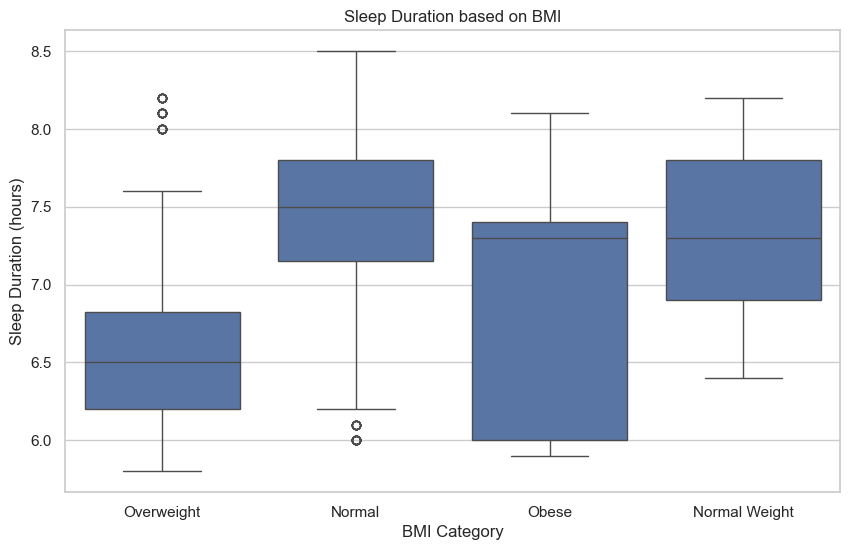

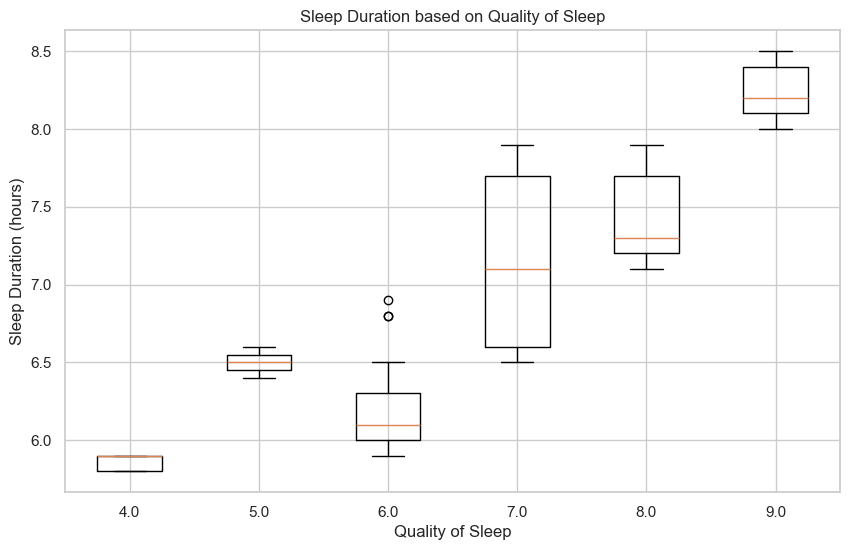

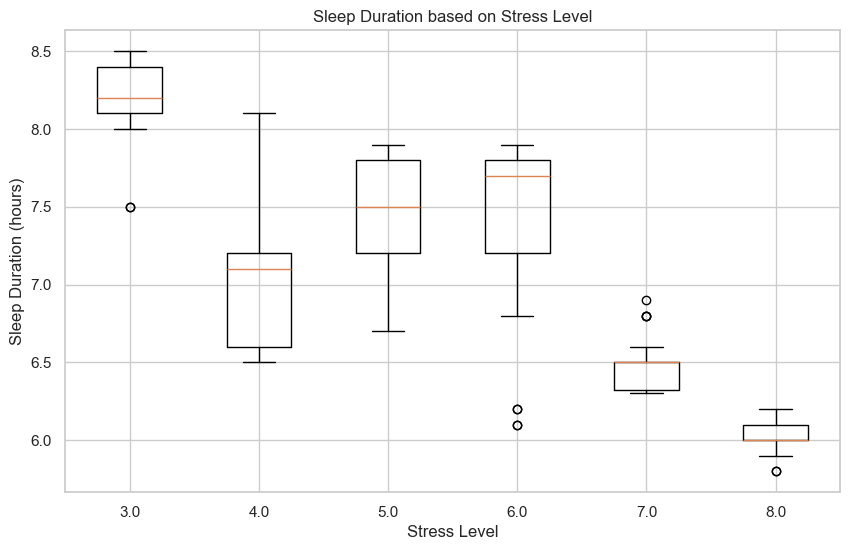

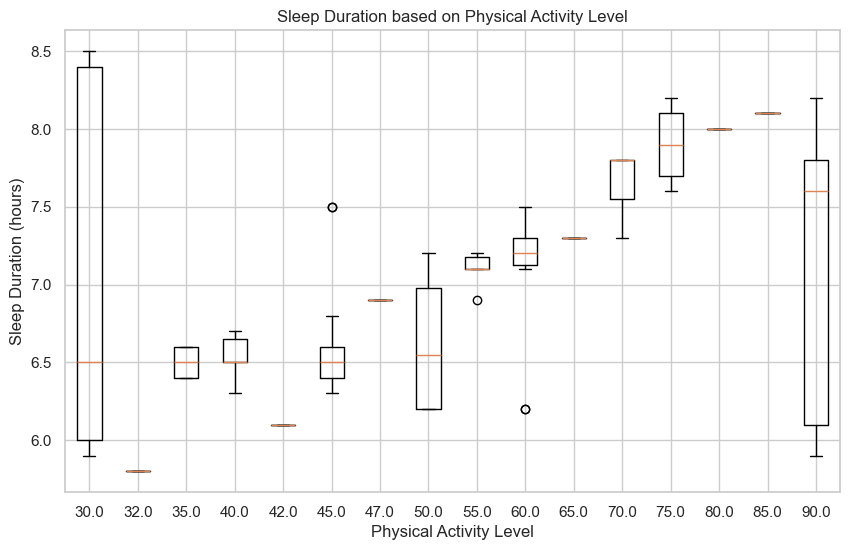

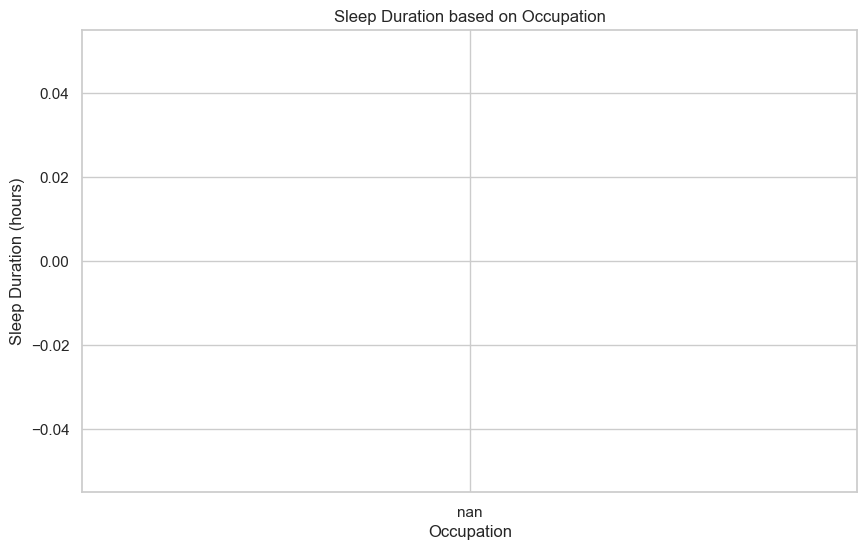

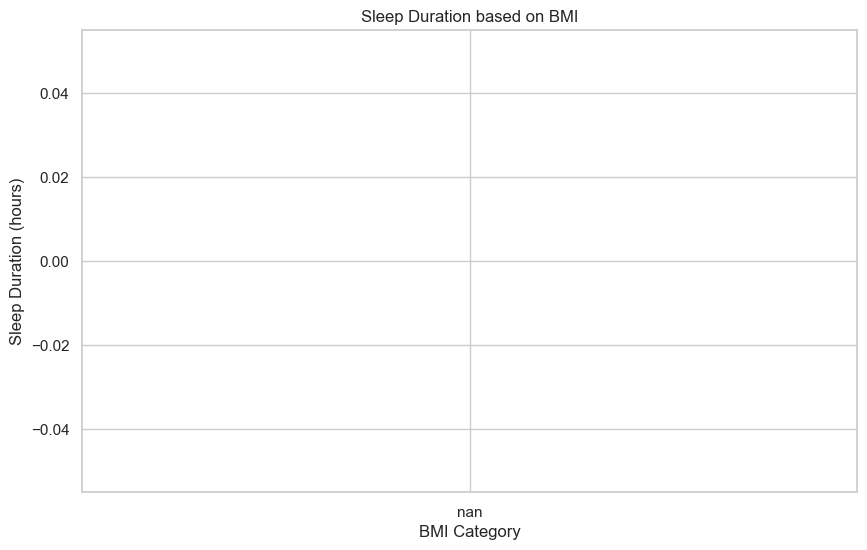

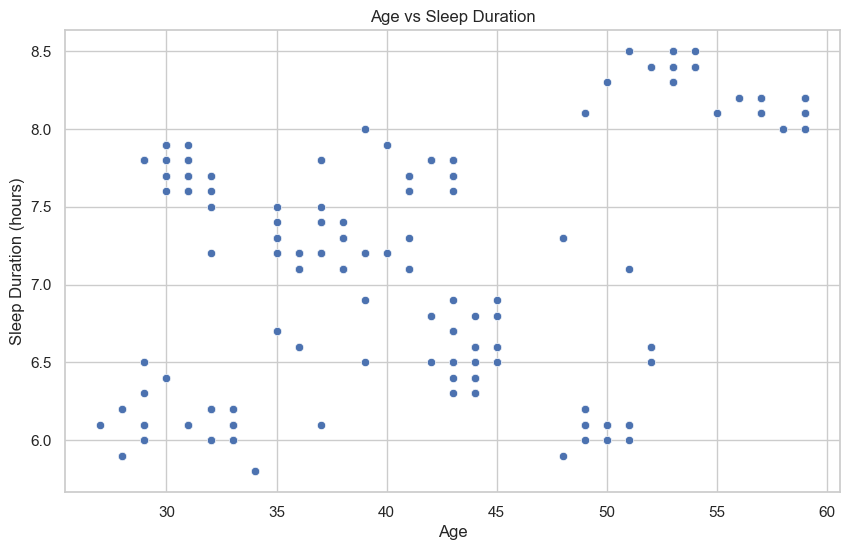

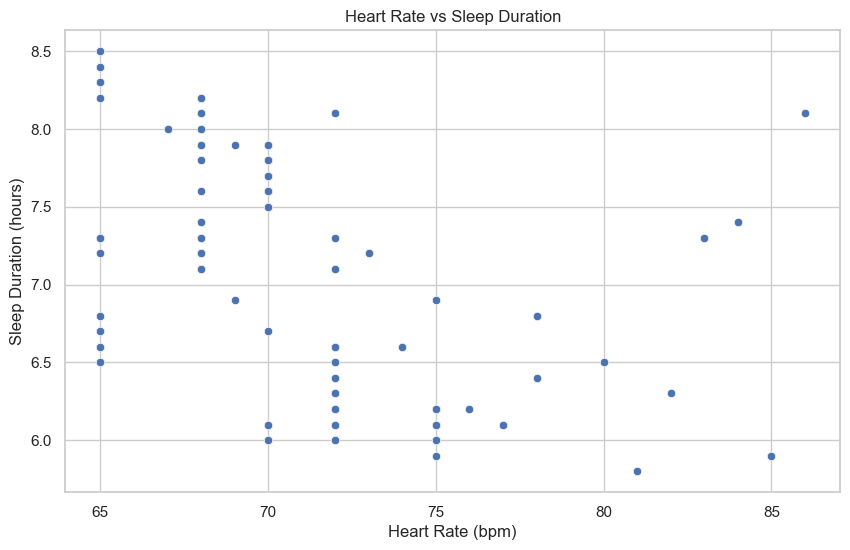

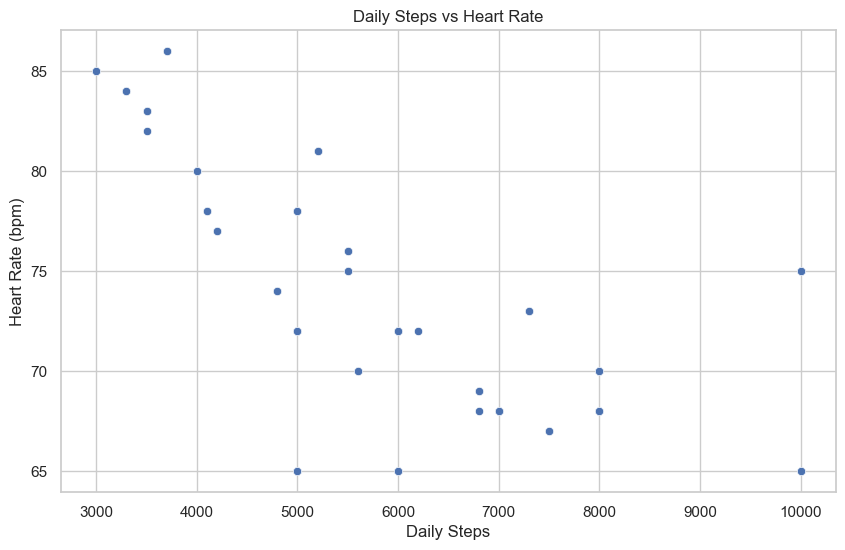

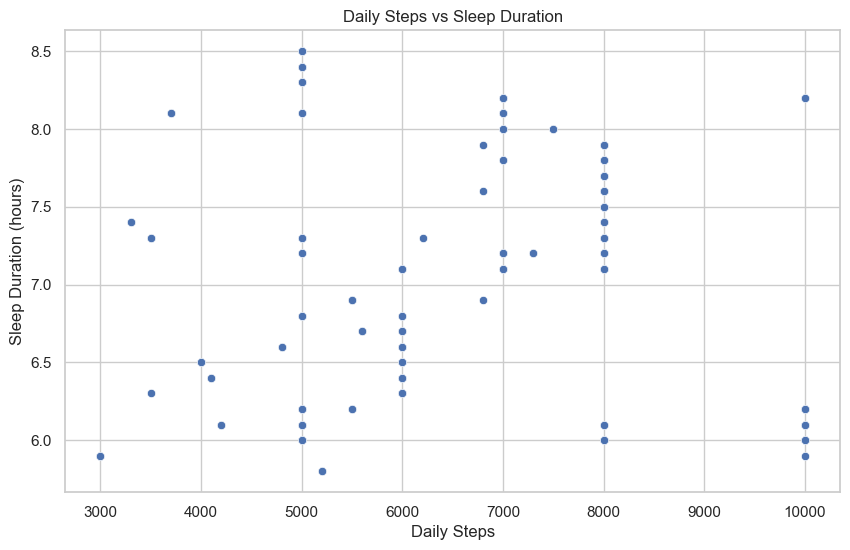

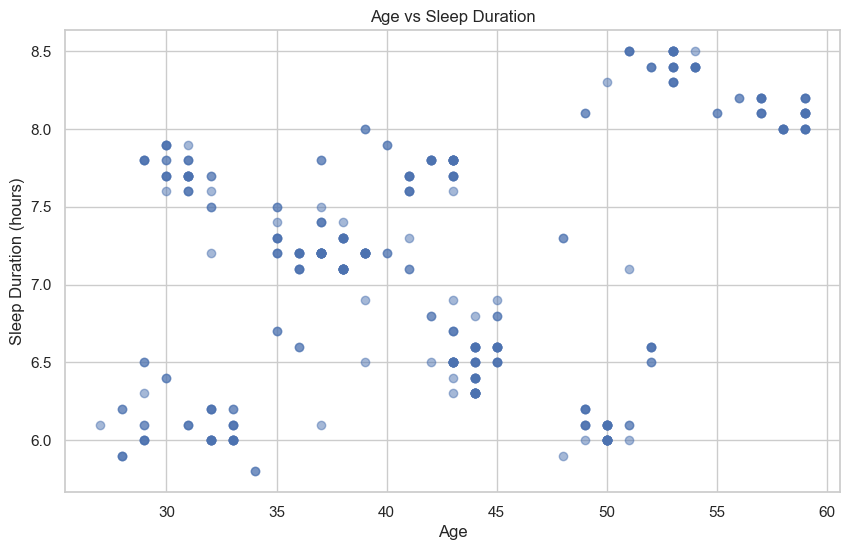

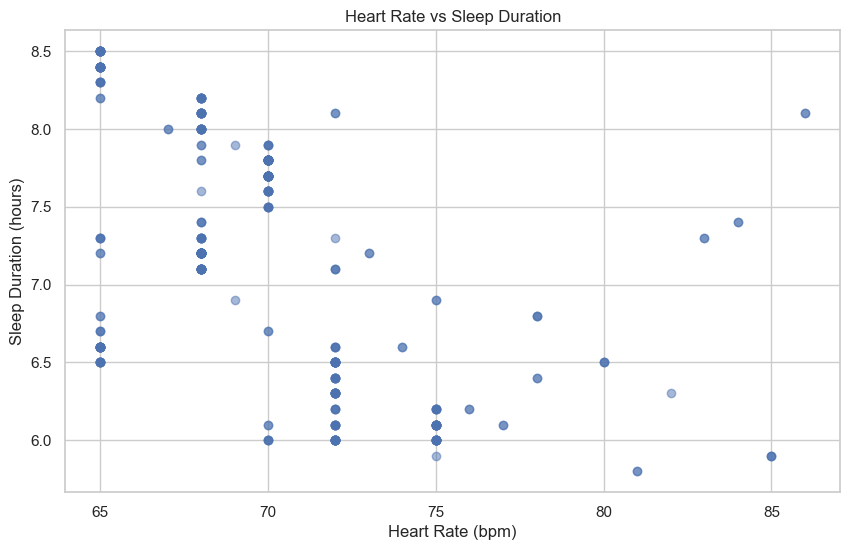

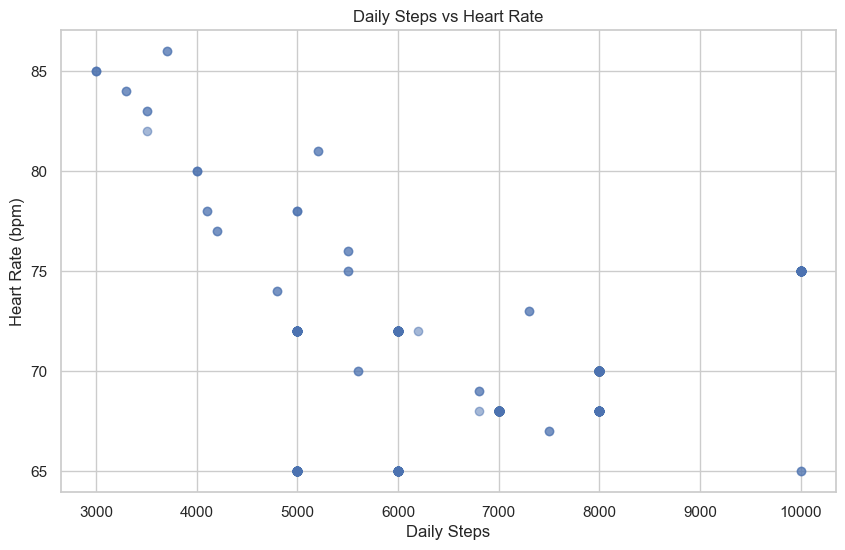

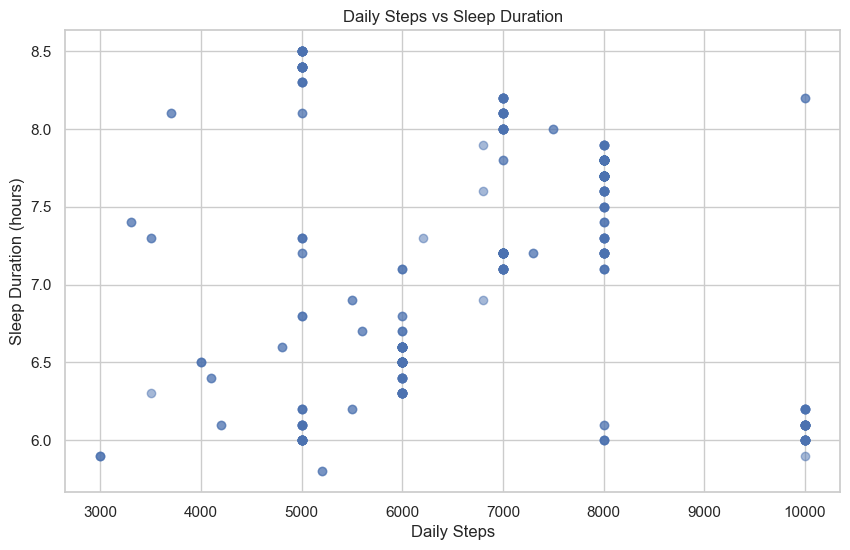

Time taken using pandas: 2.266695022583008 seconds
Time taken using NumPy: 9.025458812713623 seconds
Pandas is faster.


In [25]:
# Write your code for AIM #3 here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

df = pd.read_csv('sleep_health.csv')

start_time_pandas = time.time()

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Sleep Duration'], kde=True)
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Quality of Sleep'], kde=True)
plt.title('Quality of Sleep Distribution')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Physical Activity Level'], kde=True)
plt.title('Physical Activity Level Distribution')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Stress Level'], kde=True)
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Heart Rate'], kde=True)
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

end_time_pandas = time.time()

start_time_numpy = time.time()

data = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=1)

plt.figure(figsize=(10, 6))
plt.hist(data[:, 2], bins=30, alpha=0.7, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(data[:, 4], bins=30, alpha=0.7, color='blue')
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(data[:, 5], bins=30, alpha=0.7, color='blue')
plt.title('Quality of Sleep Distribution')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(data[:, 6], bins=30, alpha=0.7, color='blue')
plt.title('Physical Activity Level Distribution')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(data[:, 7], bins=30, alpha=0.7, color='blue')
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(data[:, 11], bins=30, alpha=0.7, color='blue')
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

end_time_numpy = time.time()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Quality of Sleep', y='Sleep Duration', data=df)
plt.title('Sleep Duration based on Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration (hours)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress Level', y='Sleep Duration', data=df)
plt.title('Sleep Duration based on Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Physical Activity Level', y='Sleep Duration', data=df)
plt.title('Sleep Duration based on Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Occupation', y='Sleep Duration', data=df)
plt.title('Sleep Duration based on Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration (hours)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI Category', y='Sleep Duration', data=df)
plt.title('Sleep Duration based on BMI')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration (hours)')
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot([data[data[:, 5] == i, 4] for i in np.unique(data[:, 5])])
plt.title('Sleep Duration based on Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(ticks=np.arange(1, len(np.unique(data[:, 5])) + 1), labels=np.unique(data[:, 5]))
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot([data[data[:, 7] == i, 4] for i in np.unique(data[:, 7])])
plt.title('Sleep Duration based on Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(ticks=np.arange(1, len(np.unique(data[:, 7])) + 1), labels=np.unique(data[:, 7]))
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot([data[data[:, 6] == i, 4] for i in np.unique(data[:, 6])])
plt.title('Sleep Duration based on Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(ticks=np.arange(1, len(np.unique(data[:, 6])) + 1), labels=np.unique(data[:, 6]))
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot([data[data[:, 3] == i, 4] for i in np.unique(data[:, 3])])
plt.title('Sleep Duration based on Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(ticks=np.arange(1, len(np.unique(data[:, 3])) + 1), labels=np.unique(data[:, 3]))
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot([data[data[:, 8] == i, 4] for i in np.unique(data[:, 8])])
plt.title('Sleep Duration based on BMI')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(ticks=np.arange(1, len(np.unique(data[:, 8])) + 1), labels=np.unique(data[:, 8]))
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Sleep Duration', data=df)
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Heart Rate', y='Sleep Duration', data=df)
plt.title('Heart Rate vs Sleep Duration')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Sleep Duration (hours)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily Steps', y='Heart Rate', data=df)
plt.title('Daily Steps vs Heart Rate')
plt.xlabel('Daily Steps')
plt.ylabel('Heart Rate (bpm)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily Steps', y='Sleep Duration', data=df)
plt.title('Daily Steps vs Sleep Duration')
plt.xlabel('Daily Steps')
plt.ylabel('Sleep Duration (hours)')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data[:, 2], data[:, 4], alpha=0.5)
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data[:, 11], data[:, 4], alpha=0.5)
plt.title('Heart Rate vs Sleep Duration')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Sleep Duration (hours)')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data[:, 12], data[:, 11], alpha=0.5)
plt.title('Daily Steps vs Heart Rate')
plt.xlabel('Daily Steps')
plt.ylabel('Heart Rate (bpm)')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data[:, 12], data[:, 4], alpha=0.5)
plt.title('Daily Steps vs Sleep Duration')
plt.xlabel('Daily Steps')
plt.ylabel('Sleep Duration (hours)')
plt.show()

end_time_numpy = time.time()

time_pandas = end_time_pandas - start_time_pandas
time_numpy = end_time_numpy - start_time_numpy

print(f"Time taken using pandas: {time_pandas} seconds")
print(f"Time taken using NumPy: {time_numpy} seconds")

if time_pandas < time_numpy:
    print("Pandas is faster.")
else:
    print("NumPy is faster.")






AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy

